In [1]:
import pandas as pd
import numpy as np
# from IPython.display import display

In [2]:
df = pd.read_csv('../data/raw/clinical_data.zip')

In [3]:
pd.set_option('display.max_columns', None)


In [4]:
df.columns

Index(['Age recode with <1 year olds and 90+',
       'Race and origin (recommended by SEER)',
       'Race recode (White, Black, Other)', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
       'Diagnostic Confirmation',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'Type of Reporting Source', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)'

## Característica AGE

In [5]:
df["Age recode with <1 year olds and 90+"].value_counts()

Age recode with <1 year olds and 90+
70-74 years    97036
65-69 years    90536
75-79 years    85304
60-64 years    69285
80-84 years    61531
55-59 years    45460
85-89 years    34987
50-54 years    21972
90+ years      16093
45-49 years     8692
40-44 years     3471
35-39 years     1532
30-34 years      754
25-29 years      375
20-24 years      196
15-19 years       85
01-04 years       37
10-14 years       35
00 years          20
05-09 years       17
Name: count, dtype: int64

In [6]:
df = df[~df['Age recode with <1 year olds and 90+'].isin(['00 years', '01-04 years', '05-09 years', '10-14 years', '15-19 years', '20-24 years', '25-29 years', '30-34 years'])]

In [7]:
df["Age recode with <1 year olds and 90+"].value_counts()

Age recode with <1 year olds and 90+
70-74 years    97036
65-69 years    90536
75-79 years    85304
60-64 years    69285
80-84 years    61531
55-59 years    45460
85-89 years    34987
50-54 years    21972
90+ years      16093
45-49 years     8692
40-44 years     3471
35-39 years     1532
Name: count, dtype: int64

##### Nota: Trabajamos con las caracteristicas mayores de 40 años por la cantidad de datos, si agrupamos a las edades comprendidas entre 20 y 39 estariamos asumiendo que uno de 20 y uno de 39 se comportan igual, perderiamos `granularidad`.
> He agrupado a los de 35-39 años con los de 40-44 años para tener mas datos. Ahora comparten el valor medio de 40-44 (42.0)

### Convertir a Valor Numérico Continúo (Midpoint Mapping)

In [8]:
def transform_age_recode(df, column_name):
    
    # Define the mapping based on your specific distribution
    age_mapping = {
        '35-39 years': 42.0,
        '40-44 years': 42.0,
        '45-49 years': 47.0,
        '50-54 years': 52.0,
        '55-59 years': 57.0,
        '60-64 years': 62.0,
        '65-69 years': 67.0,
        '70-74 years': 72.0,
        '75-79 years': 77.0,
        '80-84 years': 82.0,
        '85-89 years': 87.0,
        '90+ years': 92.5  # Standard clinical estimate for 90+
    }
    
    # Clean the string to ensure matching (strip extra spaces)
    df[column_name] = df[column_name].str.strip()
    
    # Map values and create a new numeric column
    df['age_numeric'] = df[column_name].map(age_mapping)
    
    return df


df = transform_age_recode(df, 'Age recode with <1 year olds and 90+')

In [9]:
#Borra la antigua columna de registros de edad
df = df.drop("Age recode with <1 year olds and 90+", axis=1)

## Eliminar columnas

In [10]:
df = df[~df["Diagnostic Confirmation"].isin(["Unknown", "Clinical diagnosis only"])]

> Se eliminan los registros con valores (Unknown) y (Clinical diagnosis only) debido a la ausencia e incertidumbre de la confirmación del diagnóstico.

In [11]:
columns_to_drop = ["Race and origin (recommended by SEER)",
                   "Type of Reporting Source", 
                   "Diagnostic Confirmation"]
df = df.drop(columns=columns_to_drop)

#### Observaciones:
> - `Race and origin (recommended by SEER)` se elimina debido a que es una etiqueta general.
> - `Type of Reporting Source` se elimina debido a la dominancia excesiva de (Hospital inpatient/outpatient or clinic) y categorías minoritarias como (Autopsy only) con apenas 454 registros.
> - `Diagnostic Confirmation`  una vez limpio el conjunto de datos de estos registros no validados por diagnósticos se elimina la columna.

## Característica Race

In [12]:
df.columns

Index(['Race recode (White, Black, Other)', 'Primary Site - labeled',
       'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)',
       'Derived EOD 2018 Stage Group Recode (2018+)', 'Sequence number',
       'Origin recode NHIA (Hispanic, Non-Hisp)', 'age_numeric'],
      dtype='obj

In [13]:
# Renombrar columna
df = df.rename(columns={"Race recode (White, Black, Other)": "Race"})

In [14]:
df["Race"].value_counts()

Race
White                                                        410901
Black                                                         54410
Other (American Indian/AK Native, Asian/Pacific Islander)     41534
Unknown                                                        1677
Name: count, dtype: int64

In [15]:
# Cambiar el nombre de valor (Other (American Indian/AK Native, Asian/Pacific Islander) a (Other) y añadir los valores (Unknown) a (Other).
df["Race"] = df["Race"].replace({
    "Other (American Indian/AK Native, Asian/Pacific Islander)": "Other",
    "Unknown" : "Other"}
)

df["Race"].value_counts()

Race
White    410901
Black     54410
Other     43211
Name: count, dtype: int64

## Característica PRIMARY SITE
> Lugar donde se originó el tumor primario (origen de la metástasis).

In [16]:
df.columns

Index(['Race', 'Primary Site - labeled', 'Histologic Type ICD-O-3',
       'Grade Clinical (2018+)',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)',
       'Derived EOD 2018 Stage Group Recode (2018+)', 'Sequence number',
       'Origin recode NHIA (Hispanic, Non-Hisp)', 'age_numeric'],
      dtype='object')

In [17]:
df = df.rename(columns={"Primary Site - labeled" : "Primary site"})
df["Primary site"].value_counts()

Primary site
C34.1-Upper lobe, lung              259403
C34.3-Lower lobe, lung              138339
C34.9-Lung, NOS                      62574
C34.2-Middle lobe, lung              22730
C34.0-Main bronchus                  20403
C34.8-Overlapping lesion of lung      5073
Name: count, dtype: int64

> - NOS: significa que no ha sido especificado "Not Otherwise Specified"
> - En medicina, una "lesión que se solapa" (overlapping lesion) ocurre cuando el tumor primario es tan grande o está ubicado de tal manera que invade dos o más lóbulos del pulmón (por ejemplo, parte del lóbulo superior y parte del medio) y no es posible determinar en cuál de los dos comenzó originalmente.

In [18]:
df["Primary site"] = df["Primary site"].replace({"C34.1-Upper lobe, lung": "Upper lobe",
                                                 "C34.3-Lower lobe, lung": "Lower lobe",
                                                 "C34.9-Lung, NOS": "Unspecified",
                                                 "C34.2-Middle lobe, lung": "Middle lobe",
                                                 "C34.0-Main bronchus": "Main bronchus",
                                                 "C34.8-Overlapping lesion of lung": "Overlapping"
})
df["Primary site"].value_counts()

Primary site
Upper lobe       259403
Lower lobe       138339
Unspecified       62574
Middle lobe       22730
Main bronchus     20403
Overlapping        5073
Name: count, dtype: int64

In [19]:
df.columns

Index(['Race', 'Primary site', 'Histologic Type ICD-O-3',
       'Grade Clinical (2018+)',
       'Combined Summary Stage with Expanded Regional Codes (2004+)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
       'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
       'Vital status recode (study cutoff used)',
       'SEER cause-specific death classification', 'Year of diagnosis',
       'Median household income inflation adj to 2023',
       'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
       'Rural-Urban Continuum Code', 'PRCDA 2020',
       'Total number of in situ/malignant tumors for patient',
       'CS extension (2004-2015)',
       'Derived EOD 2018 Stage Group Recode (2018+)', 'Sequence number',
       'Origin recode NHIA (Hispanic, Non-Hisp)', 'age_numeric'],
      dtype='object')

### Correlation Heatmap

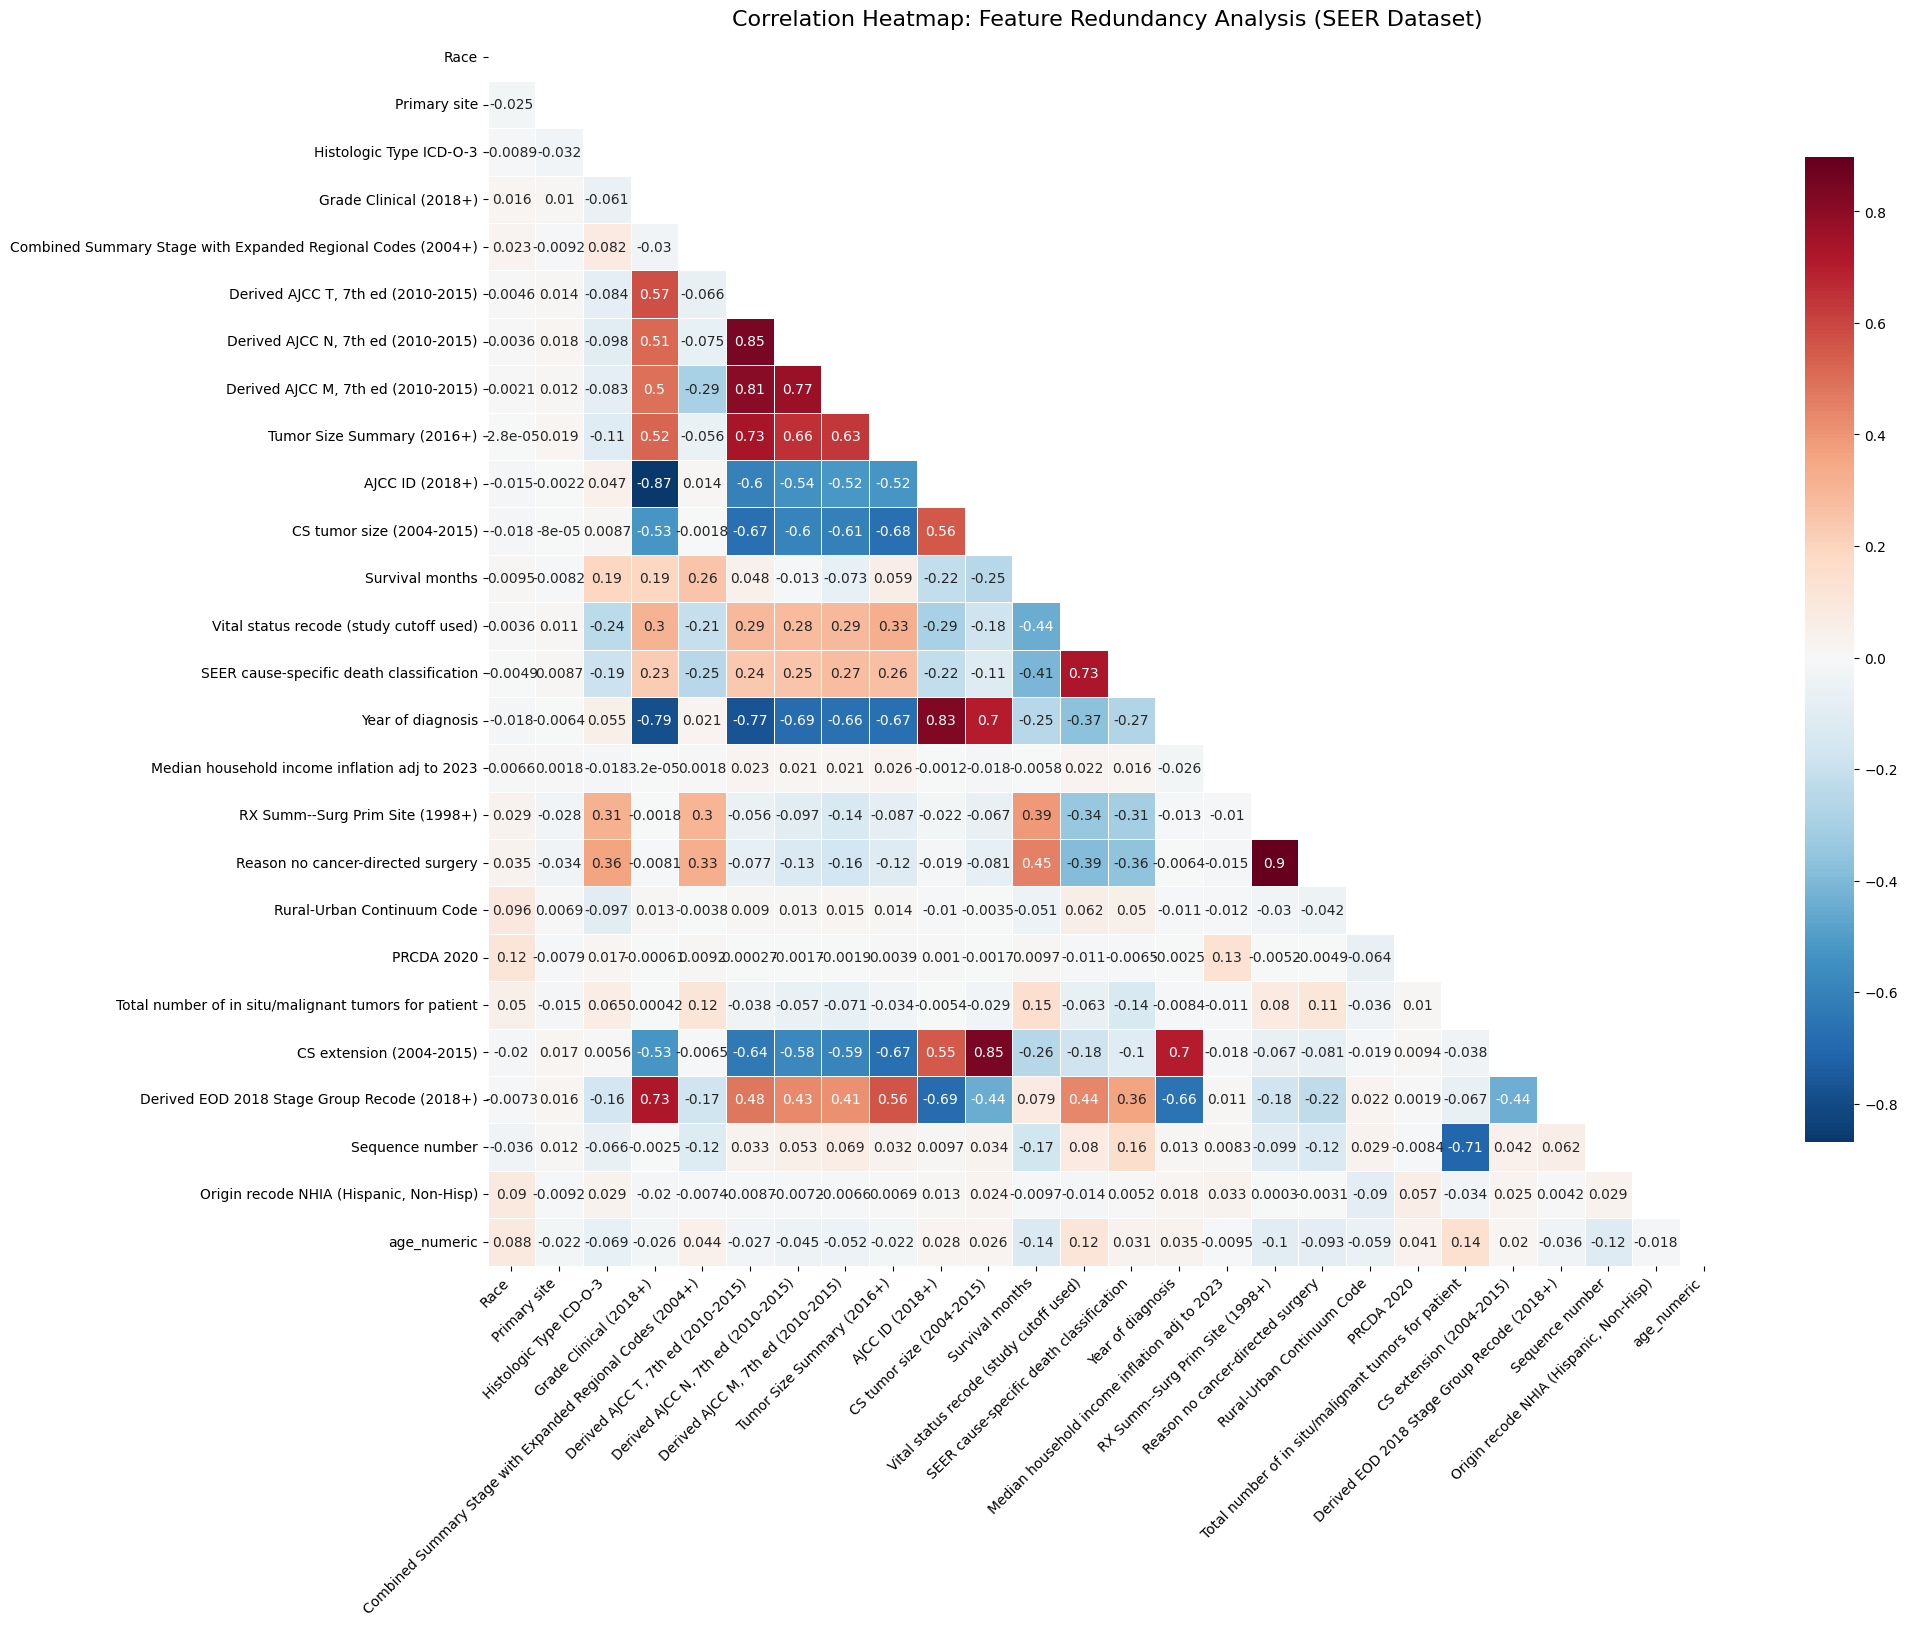

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_seer_heatmap(df):
    """
    Encodes categorical features and plots a correlation heatmap 
    to identify redundant columns in SEER data.
    """
    # 1. Select the columns provided in your index
    columns_to_analyze = [
        'Race', 
        'Primary site', 'Histologic Type ICD-O-3', 'Grade Clinical (2018+)',
        'Combined Summary Stage with Expanded Regional Codes (2004+)',
        'Derived AJCC T, 7th ed (2010-2015)', 'Derived AJCC N, 7th ed (2010-2015)',
        'Derived AJCC M, 7th ed (2010-2015)', 'Tumor Size Summary (2016+)',
        'AJCC ID (2018+)', 'CS tumor size (2004-2015)', 'Survival months',
        'Vital status recode (study cutoff used)', 'SEER cause-specific death classification', 
        'Year of diagnosis', 'Median household income inflation adj to 2023',
        'RX Summ--Surg Prim Site (1998+)', 'Reason no cancer-directed surgery',
        'Rural-Urban Continuum Code', 'PRCDA 2020',
        'Total number of in situ/malignant tumors for patient', 'CS extension (2004-2015)',
        'Derived EOD 2018 Stage Group Recode (2018+)', 'Sequence number',
        'Origin recode NHIA (Hispanic, Non-Hisp)', 'age_numeric'
    ]
    
    # Filter only available columns to avoid errors
    analysis_df = df[columns_to_analyze].copy()

    # 2. Encode categorical columns to numeric codes for correlation analysis
    for col in analysis_df.select_dtypes(include=['object', 'category']).columns:
        analysis_df[col] = analysis_df[col].astype('category').cat.codes

    # 3. Calculate Correlation Matrix
    corr_matrix = analysis_df.corr()

    # 4. Visualization
    plt.figure(figsize=(20, 16))
    
    # Mask to hide the upper triangle (it's redundant)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(
        corr_matrix, 
        mask=mask, 
        annot=True,
        cmap='RdBu_r', 
        center=0,
        linewidths=.5,
        cbar_kws={"shrink": .8}
    )
    
    plt.title('Correlation Heatmap: Feature Redundancy Analysis (SEER Dataset)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Execution:
plot_seer_heatmap(df)

In [21]:
df["Combined Summary Stage with Expanded Regional Codes (2004+)"].value_counts()

Combined Summary Stage with Expanded Regional Codes (2004+)
Distant site(s)/node(s) involved                                260068
Localized only                                                  124674
Regional lymph nodes involved only                               44292
Regional by direct extension only                                34446
Regional by both direct extension and lymph node involvement     29831
Unknown/unstaged/unspecified/DCO                                 15208
In situ                                                              3
Name: count, dtype: int64

In [22]:
df.iloc[0]["Combined Summary Stage with Expanded Regional Codes (2004+)"]

'Regional by both direct extension and lymph node involvement'

In [23]:
df.iloc[0]["Combined Summary Stage with Expanded Regional Codes (2004+)"]

'Regional by both direct extension and lymph node involvement'

In [24]:
df["Derived AJCC T, 7th ed (2010-2015)"].value_counts()

Derived AJCC T, 7th ed (2010-2015)
Blank(s)    323834
T4           37610
T3           34583
T2a          31728
T1a          23710
TX           22169
T1b          16701
T2b          11634
T2NOS         4826
T0            1159
T1NOS          192
Name: count, dtype: int64

In [25]:
df["Derived AJCC N, 7th ed (2010-2015)"].value_counts()

Derived AJCC N, 7th ed (2010-2015)
Blank(s)    323834
N0           74342
N2           60491
N3           22682
N1           14460
NX           12337
Name: count, dtype: int64

In [26]:
df["Derived AJCC M, 7th ed (2010-2015)"].value_counts()

Derived AJCC M, 7th ed (2010-2015)
Blank(s)    323834
M0           95557
M1b          63559
M1a          23696
M1NOS         1500
Name: count, dtype: int64

In [27]:
df["Total number of in situ/malignant tumors for patient"].value_counts()

Total number of in situ/malignant tumors for patient
1     347350
2     116804
3      32992
4       8515
5       2053
6        548
7        171
8         39
9         20
10        10
11         5
21         2
13         2
14         2
32         2
20         2
30         2
34         1
18         1
23         1
Name: count, dtype: int64

In [28]:
df["Sequence number"].value_counts()

Sequence number
One primary only                343995
2nd of 2 or more primaries      104460
1st of 2 or more primaries       28423
3rd of 3 or more primaries       24590
4th of 4 or more primaries        5476
5th of 5 or more primaries        1165
6th of 6 or more primaries         285
7th of 7 or more primaries          83
8th of 8 or more primaries          17
9th of 9 or more primaries           7
10th of 10 or more primaries         5
21st of 21 or more primaries         2
13th of 13 or more primaries         2
14th of 14 or more primaries         2
11th of 11 or more primaries         2
32nd of 32 or more primaries         2
30th of 30 or more primaries         2
20th of 20 or more primaries         2
17th of 17 or more primaries         1
34th of 34 or more primaries         1
Name: count, dtype: int64

In [29]:
df["Vital status recode (study cutoff used)"].value_counts()

Vital status recode (study cutoff used)
Dead     363145
Alive    145377
Name: count, dtype: int64

In [30]:
df["Rural-Urban Continuum Code"].value_counts()


Rural-Urban Continuum Code
Counties in metropolitan areas ge 1 million pop                 276566
Counties in metropolitan areas of 250,000 to 1 million pop      108070
Nonmetropolitan counties adjacent to a metropolitan area         46629
Counties in metropolitan areas of lt 250 thousand pop            44071
Nonmetropolitan counties not adjacent to a metropolitan area     32381
Unknown/missing/no match (Alaska or Hawaii - Entire State)         788
Unknown/missing/no match/Not 1990-2023                              17
Name: count, dtype: int64

In [31]:
df = df[~df["Rural-Urban Continuum Code"].isin(["Unknown/missing/no match (Alaska or Hawaii - Entire State)", "Unknown/missing/no match/Not 1990-2023"])]

In [32]:
df["Rural-Urban Continuum Code"].value_counts()


Rural-Urban Continuum Code
Counties in metropolitan areas ge 1 million pop                 276566
Counties in metropolitan areas of 250,000 to 1 million pop      108070
Nonmetropolitan counties adjacent to a metropolitan area         46629
Counties in metropolitan areas of lt 250 thousand pop            44071
Nonmetropolitan counties not adjacent to a metropolitan area     32381
Name: count, dtype: int64

# Analisis de variables

In [33]:
df.head()

,Race,Primary site,Histologic Type ICD-O-3,Grade Clinical (2018+),Combined Summary Stage with Expanded Regional Codes (2004+),"Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)",Tumor Size Summary (2016+),AJCC ID (2018+),CS tumor size (2004-2015),Survival months,Vital status recode (study cutoff used),SEER cause-specific death classification,Year of diagnosis,Median household income inflation adj to 2023,RX Summ--Surg Prim Site (1998+),Reason no cancer-directed surgery,Rural-Urban Continuum Code,PRCDA 2020,Total number of in situ/malignant tumors for patient,CS extension (2004-2015),Derived EOD 2018 Stage Group Recode (2018+),Sequence number,"Origin recode NHIA (Hispanic, Non-Hisp)",age_numeric
0,White,Upper lobe,8140,2,Regional by both direct extension and lymph no...,Blank(s),Blank(s),Blank(s),070,Lung,Blank(s),0059,Alive,Alive or dead of other cause,2018,"$120,000+",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,Blank(s),3A,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0
1,White,Main bronchus,8140,Blank(s),Distant site(s)/node(s) involved,Blank(s),Blank(s),Blank(s),109,Blank(s),Blank(s),0027,Dead,Dead (attributable to this cancer dx),2016,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,Blank(s),Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0
2,Black,Unspecified,8041,Blank(s),Unknown/unstaged/unspecified/DCO,TX,NX,M0,Blank(s),Blank(s),999,0000,Dead,Dead (attributable to this cancer dx),2014,"$110,000 - $119,999",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,999,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0
3,White,Upper lobe,8550,Blank(s),Regional by direct extension only,T3,N0,M0,Blank(s),Blank(s),028,0052,Dead,Dead (attributable to this cancer dx),2015,"$100,000 - $109,999",33,Surgery performed,Counties in metropolitan areas ge 1 million pop,Not PRCDA,2,100,Blank(s),2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,82.0
4,White,Upper lobe,8140,3,Localized only,Blank(s),Blank(s),Blank(s),033,Lung,Blank(s),0012,Dead,Alive or dead of other cause,2020,"$120,000+",0,Not recommended,Counties in metropolitan areas ge 1 million pop,Not PRCDA,3,Blank(s),1B,2nd of 2 or more primaries,Non-Spanish-Hispanic-Latino,67.0


In [34]:
# Creamos una tabla resumen de las 29 columnas
resumen_columnas = pd.DataFrame({
    'Tipo': df.dtypes,
    'No Nulos': df.count(),
    'Nulos': df.isnull().sum()
})

# Forzamos a Pandas a mostrar todas las filas de este resumen
pd.set_option('display.max_rows', None)

display(resumen_columnas)

,Tipo,No Nulos,Nulos
Race,object,507717,0
Primary site,object,507717,0
Histologic Type ICD-O-3,int64,507717,0
Grade Clinical (2018+),object,507717,0
Combined Summary Stage with Expanded Regional Codes (2004+),object,507717,0
"Derived AJCC T, 7th ed (2010-2015)",object,507341,376
"Derived AJCC N, 7th ed (2010-2015)",object,507341,376
"Derived AJCC M, 7th ed (2010-2015)",object,507341,376
Tumor Size Summary (2016+),object,507717,0
AJCC ID (2018+),object,507717,0


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Histologic Type ICD-O-3,507717.0,8128.342978,125.921960,8000.0,8046.0,8140.0,8140.0,9580.0
Year of diagnosis,507717.0,2016.982254,3.144400,2012.0,2014.0,2017.0,2020.0,2022.0
RX Summ--Surg Prim Site (1998+),507717.0,7.172033,14.631064,0.0,0.0,0.0,0.0,99.0
Total number of in situ/malignant tumors for patient,507717.0,1.435101,0.760477,1.0,1.0,1.0,2.0,34.0
age_numeric,507717.0,70.275899,10.440918,42.0,62.0,72.0,77.0,92.5


In [36]:
#eliminacion de datos duplicados
# df.drop_duplicates()

In [37]:
df.nunique()

Race                                                             3
Primary site                                                     6
Histologic Type ICD-O-3                                        185
Grade Clinical (2018+)                                          11
Combined Summary Stage with Expanded Regional Codes (2004+)      7
Derived AJCC T, 7th ed (2010-2015)                              11
Derived AJCC N, 7th ed (2010-2015)                               6
Derived AJCC M, 7th ed (2010-2015)                               5
Tumor Size Summary (2016+)                                     298
AJCC ID (2018+)                                                  5
CS tumor size (2004-2015)                                      285
Survival months                                                133
Vital status recode (study cutoff used)                          2
SEER cause-specific death classification                         3
Year of diagnosis                                             

In [38]:
df["RX Summ--Surg Prim Site (1998+)"].value_counts()

RX Summ--Surg Prim Site (1998+)
0     394401
33     66565
21     19658
30      8939
22      6172
56      2165
99      2053
45      1963
12       830
23       759
46       750
90       654
55       632
20       519
24       383
15       331
13       259
19       194
80       134
25        91
47        79
48        66
70        57
66        36
65        27
Name: count, dtype: int64

In [39]:
df["Reason no cancer-directed surgery"].value_counts()

Reason no cancer-directed surgery
Not recommended                                                                 356684
Surgery performed                                                               111263
Not recommended, contraindicated due to other cond; autopsy only (1973-2002)     23748
Recommended but not performed, patient refused                                    7624
Recommended but not performed, unknown reason                                     3863
Unknown; death certificate; or autopsy only (2003+)                               2428
Recommended, unknown if performed                                                 1120
Not performed, patient died prior to recommended surgery                           987
Name: count, dtype: int64

In [40]:
# 1. Identificar columnas no numéricas
columnas_no_num = df.select_dtypes(exclude=['number']).columns

# 2. Iterar y mostrar usando f-strings
for col in columnas_no_num:
    print(col)
    print(df[col].unique())
   

Race
['White' 'Black' 'Other']
Primary site
['Upper lobe' 'Main bronchus' 'Unspecified' 'Lower lobe' 'Middle lobe'
 'Overlapping']
Grade Clinical (2018+)
['2' 'Blank(s)' '3' '9' '1' '4' 'D' 'C' 'B' 'H' 'A']
Combined Summary Stage with Expanded Regional Codes (2004+)
['Regional by both direct extension and lymph node involvement'
 'Distant site(s)/node(s) involved' 'Unknown/unstaged/unspecified/DCO'
 'Regional by direct extension only' 'Localized only'
 'Regional lymph nodes involved only' 'In situ']
Derived AJCC T, 7th ed (2010-2015)
['Blank(s)' 'TX' 'T3' 'T1b' 'T4' 'T1a' 'T2a' 'T2b' nan 'T2NOS' 'T1NOS'
 'T0']
Derived AJCC N, 7th ed (2010-2015)
['Blank(s)' 'NX' 'N0' 'N2' 'N3' 'N1' nan]
Derived AJCC M, 7th ed (2010-2015)
['Blank(s)' 'M0' 'M1a' 'M1b' nan 'M1NOS']
Tumor Size Summary (2016+)
['070' '109' 'Blank(s)' '033' '020' '023' '999' '030' '016' '050' '056'
 '066' '018' '026' '000' '048' '022' '024' '005' '007' '029' '045' '012'
 '008' '013' '034' '014' '072' '035' '025' '990' '041' '